In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import shap

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\telecom_users.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df1 = df[df['TotalCharges'] != ' ']

In [7]:
df1['TotalCharges'] = df1.TotalCharges.astype(float)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
X = df1.iloc[:, 2:-1]
y = df1.iloc[:, -1].replace({'Yes':1,'No':0})

In [9]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [10]:
X[['gender','Partner','Dependents','PhoneService','PaperlessBilling']] = X[['gender','Partner','Dependents','PhoneService','PaperlessBilling']].replace({'Yes':1,'No':0,'Male':1,'Female':0})
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,72,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65
1,0,0,0,0,44,1,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.20
2,0,1,1,0,38,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85
3,1,0,0,0,4,1,No,DSL,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.50
4,1,0,0,0,2,1,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Electronic check,53.45,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,1,Electronic check,95.00,95.00
5982,0,0,1,1,23,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),91.10,2198.30
5983,1,0,1,1,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Electronic check,21.15,306.05
5984,1,1,0,0,12,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.45,1200.15


In [11]:
enc = OneHotEncoder()

In [12]:
X_enc = enc.fit_transform(X)
X_enc

<5976x7250 sparse matrix of type '<class 'numpy.float64'>'
	with 113544 stored elements in Compressed Sparse Row format>

In [13]:
model = LogisticRegression(max_iter=10000)

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=23)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [16]:
y_pred = model.predict(X_test)

In [17]:
def metrics(y_true, y_pred):
    print('Accuracy :', accuracy_score(y_true, y_pred))
    print('f1 :', f1_score(y_true, y_pred))
    print('ROC AUC :', roc_auc_score(y_true, y_pred))

In [18]:
metrics(y_test, y_pred)

Accuracy : 0.7908533184606804
f1 score : 0.5874587458745875
ROC AUC : 0.7132760173662083


<AxesSubplot:>

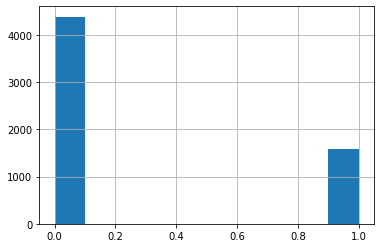

In [19]:
y.hist()

In [20]:
params = {
    "C":np.logspace(-3,3,7), "penalty":["none","elasticnet","l1","l2"]
}
grid = GridSearchCV(model, params, scoring='f1', cv=5,verbose=1)
grid.fit(X_train, y_train);

Fitting 5 folds for each of 28 candidates, totalling 140 fits


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' wi

In [21]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [22]:
model_best = grid.best_estimator_.fit(X_train, y_train)

In [23]:
metrics(y_test,model_best.predict(X_test))

Accuracy : 0.7908533184606804
f1 score : 0.5874587458745875
ROC AUC : 0.7132760173662083


In [52]:
explainer = shap.Explainer(model_best, X_train)
shap_values = explainer(X_test)

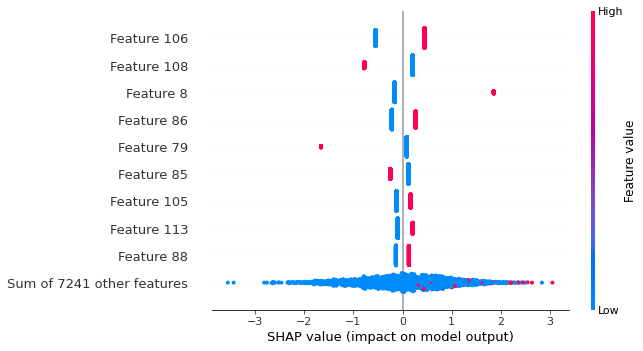

In [53]:
shap.plots.beeswarm(shap_values)

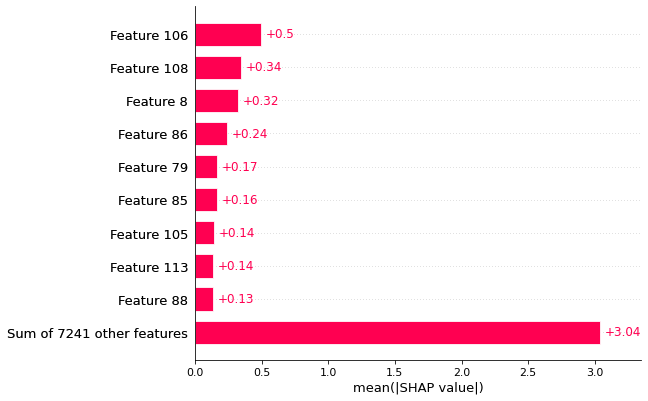

In [38]:
shap.plots.bar(shap_values)

# Выводы

Оптимизация гиперпараметров логистической регрессии незначительно улучшило качество модели.